In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import netCDF4 as nc
import datetime as dt
import cmocean
import string
import glob
import pickle
import matplotlib as mpl
from salishsea_tools import evaltools as et
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = ','.join(r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
from scipy.ndimage import gaussian_filter
from matplotlib.ticker import FormatStrFormatter
from NorthNut import vvl_interp_T_to_V, vvl_interp_T_to_U;

%matplotlib inline

NorthNut defined variables: ig0,ig1,jg0,jg1,fformat0
NorthNut defined variables: vmask, vmask0, umask, umask0, tmask, fmask, gdept,  gdept_1d, e1t, e2t, e12t, e1f, e2f, e1v, e2u, e3t_1d
NorthNut defined variables: boxCol, colL, colR, arrowwidth, headwidth, headlength, alen, toff, apw, apk


calculations have been moved to calcTranspsEstuarineExchange.py

In [2]:
fformat0='%Y%m%d'
mod_start=dt.datetime(2018,1,1)
mod_end=dt.datetime(2018,12,31)
savepath='../../save/transpLines'+mod_start.strftime(fformat0)+'-'+mod_end.strftime(fformat0)+'.pkl'

In [3]:
data=pickle.load(open(savepath,'rb'))
mod_start=data['mod_start']
mod_end=data['mod_end']
volT=data['volT']
no3T=data['no3T']
no3=data['no3']
masks=data['masks']
gdept_1d=data['gdept_1d']
e3t_1d=data['e3t_1d']
ulines=data['ulines']
vlines=data['vlines']

In [4]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])

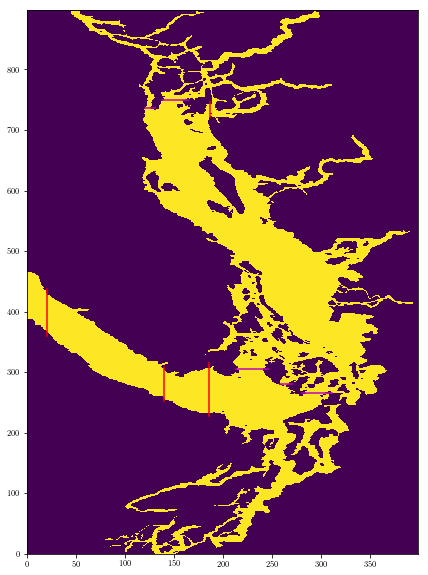

In [5]:
fig,ax=plt.subplots(1,1,figsize=(7,10))
ax.pcolormesh(umask[0,0,:,:])
for el in ulines.keys():
    ax.plot((ulines[el]['i'],ulines[el]['i']),(ulines[el]['j'][0],ulines[el]['j'][1]),'r-')
for el in vlines.keys():
    ax.plot((vlines[el]['i'][0],vlines[el]['i'][1]),(vlines[el]['j'],vlines[el]['j']),'m-')
#ax.plot((50,50),(325,408),'c-')
#ax.plot((100,100),(275,352),'c-')
#ax.plot((121,188),(791,791),'c-')
#ax.plot((140,140),(253,308),'w-')

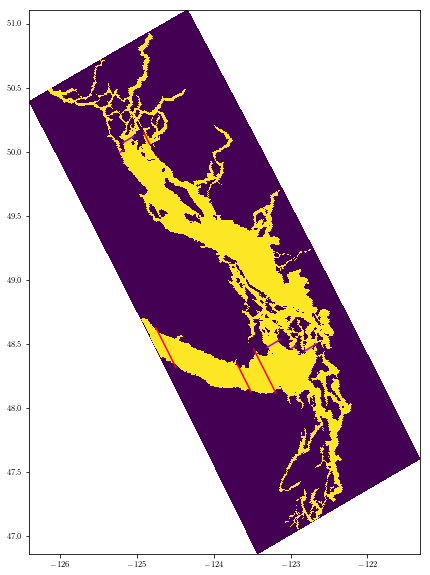

In [6]:
fig,ax=plt.subplots(1,1,figsize=(7,10))
ax.pcolormesh(navlon,navlat,umask[0,0,:,:])
for el in ulines.keys():
    #ax.plot((ulines[el]['i'],ulines[el]['i']),(ulines[el]['j'][0],ulines[el]['j'][1]),'r-')
    ax.plot((navlon[ulines[el]['j'][0],ulines[el]['i']],navlon[ulines[el]['j'][1],ulines[el]['i']]),
            (navlat[ulines[el]['j'][0],ulines[el]['i']],navlat[ulines[el]['j'][1],ulines[el]['i']]),'r-')
for el in vlines.keys():
    ax.plot((navlon[vlines[el]['j'],vlines[el]['i']][0],navlon[vlines[el]['j'],vlines[el]['i'][1]]),
            (navlat[vlines[el]['j'],vlines[el]['i']][0],navlat[vlines[el]['j'],vlines[el]['i'][1]]),'m-')

#ax.plot((navlon[250,143],navlon[305,143]),
#        (navlat[250,143],navlat[305,143]),'m-')
 
#ax.plot((50,50),(325,408),'c-')
#ax.plot((100,100),(275,352),'c-')
#ax.plot((121,188),(791,791),'c-')

In [7]:
e3t_1d

masked_array(data=[1.0000011545549246, 1.0000050146313075,
                   1.0000125330301763, 1.0000271768590778,
                   1.000055699095645, 1.0001112526466258,
                   1.0002194555057198, 1.0004302033056973,
                   1.00084067413683, 1.001640124846535,
                   1.0031971007156422, 1.0062291389536533,
                   1.012132707944847, 1.0236235758257202,
                   1.0459755093254142, 1.089400606637021,
                   1.1735642803318154, 1.3359289925405164,
                   1.6463678079268433, 2.229902849402567,
                   3.2924856660854385, 5.1199850823910555,
                   7.974515064757118, 11.82529720421952,
                   16.107920438013576, 19.95870257747598,
                   22.813232559842042, 24.640731976147656,
                   25.70331479283053, 26.286849834306253,
                   26.59728864969258, 26.75965336190128,
                   26.843817035596075, 26.88724213290768,
           

In [8]:
np.shape(no3T['Discovery'])

(8760, 40, 11)

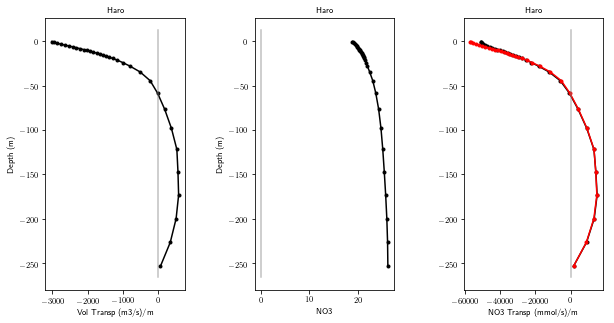

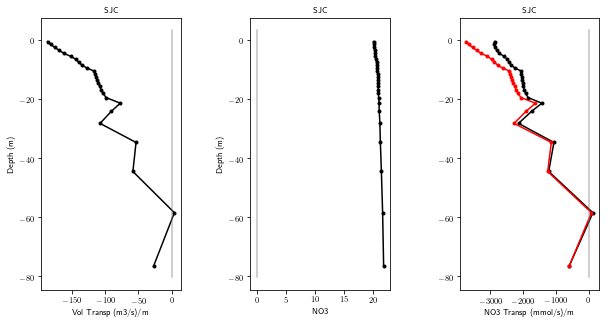

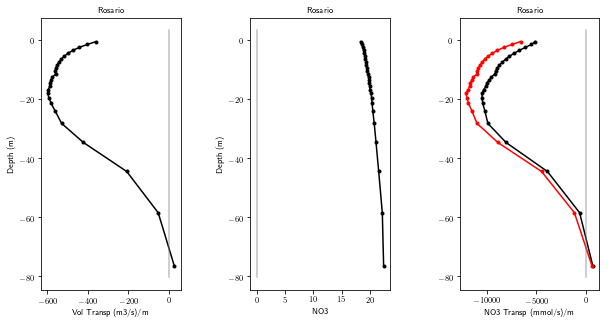

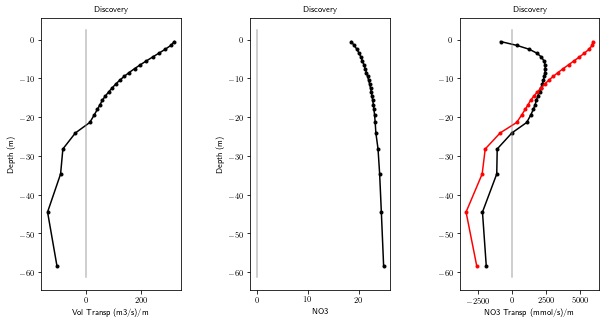

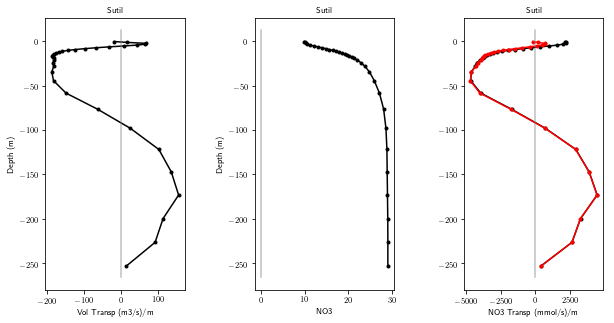

In [9]:
# plot 2015 transps, vlines
for ipath in vlines.keys():
    imask=np.tile(np.expand_dims(masks[ipath],0),(np.shape(no3[ipath])[0],1,1))
    fig,ax=plt.subplots(1,3,figsize=(10,5)); fig.subplots_adjust(wspace=.5)
    vmean=np.mean(np.sum(volT[ipath],2),0)
    nmean=np.mean(np.mean(np.ma.masked_where(imask==0,no3[ipath]),2),0)
    ax[0].plot(vmean/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')
    ax[0].set_title(ipath); ax[0].set_xlabel('Vol Transp (m3/s)/m'); ax[0].set_ylabel('Depth (m)')
    yl=ax[0].get_ylim(); ax[0].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[0].set_ylim(-450,0)
    imask=np.tile(np.expand_dims(masks[ipath],0),(np.shape(no3[ipath])[0],1,1))
    ax[1].plot(nmean,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')
    ax[1].set_title(ipath); ax[1].set_xlabel('NO3'); ax[1].set_ylabel('Depth (m)')
    ax[1].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[1].set_ylim(-450,0)
    ax[2].plot(np.mean(np.sum(no3T[ipath],2),0)/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')#*1e-3*62.0049*1e-3
    ax[2].plot(vmean*nmean/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'r.-')
    ax[2].set_title(ipath); ax[2].set_xlabel('NO3 Transp (mmol/s)/m'); ax[1].set_ylabel('Depth (m)')
    ax[2].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[1].set_ylim(-450,0)

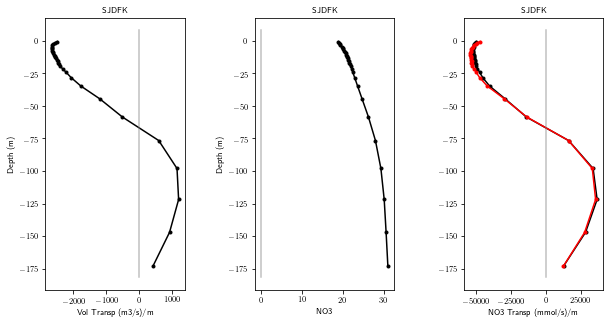

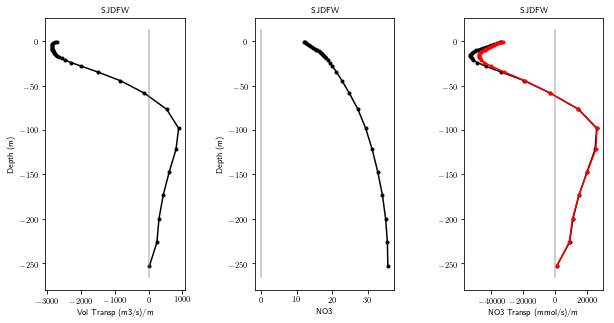

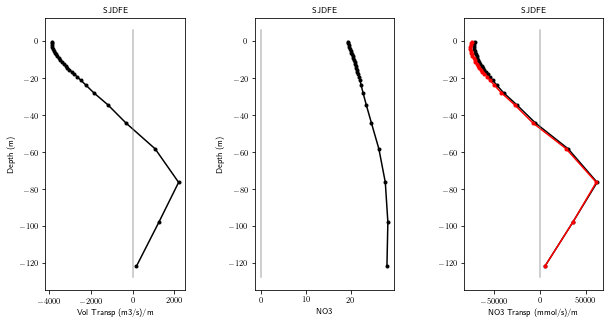

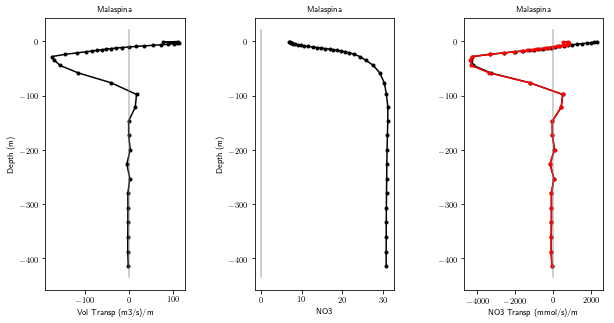

In [10]:
# plot 2015 transps, ulines
for ipath in ulines.keys():
    imask=np.tile(np.expand_dims(masks[ipath],0),(np.shape(no3[ipath])[0],1,1))
    fig,ax=plt.subplots(1,3,figsize=(10,5)); fig.subplots_adjust(wspace=.5)
    vmean=np.mean(np.sum(volT[ipath],2),0)
    nmean=np.mean(np.mean(np.ma.masked_where(imask==0,no3[ipath]),2),0)
    ax[0].plot(vmean/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')
    ax[0].set_title(ipath); ax[0].set_xlabel('Vol Transp (m3/s)/m'); ax[0].set_ylabel('Depth (m)')
    yl=ax[0].get_ylim(); ax[0].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[0].set_ylim(-450,0)
    imask=np.tile(np.expand_dims(masks[ipath],0),(np.shape(no3[ipath])[0],1,1))
    ax[1].plot(nmean,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')
    ax[1].set_title(ipath); ax[1].set_xlabel('NO3'); ax[1].set_ylabel('Depth (m)')
    ax[1].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[1].set_ylim(-450,0)
    ax[2].plot(np.mean(np.sum(no3T[ipath],2),0)/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'k.-')#*1e-3*62.0049*1e-3
    ax[2].plot(vmean*nmean/e3t_1d,-1*np.ma.masked_where(np.sum(masks[ipath],1)==0,gdept_1d),'r.-')
    ax[2].set_title(ipath); ax[2].set_xlabel('NO3 Transp (mmol/s)/m'); ax[1].set_ylabel('Depth (m)')
    ax[2].plot((0,0),yl,'-',color='gray',alpha=.5); #ax[1].set_ylim(-450,0)

3.0842004154222336 kmol/s
[     0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.         328275.45536568 775897.99957625 908918.86153868
 734933.69396954 336174.40497208      0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.        ]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         19.95870258 22.81323256 24.64073198 25.70331479 26.28684983
  0.          0.          0.          0.          0.  

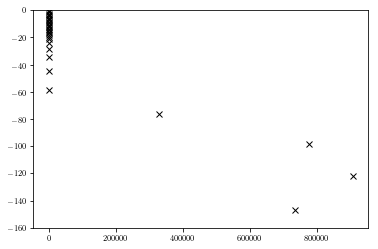

In [11]:
ipath='SJDFK'
transp=np.mean(np.sum(no3T[ipath],2),0)#*1e-3*62.0049*1e-3
plt.plot(np.where(transp>0,transp,0),-1*gdept_1d,'kx')
plt.ylim(-160,0)
print(np.sum(np.where(transp>0,transp,0))*1e-6,'kmol/s')
print(np.where(transp>0,transp,0))
print(np.where(transp>0,e3t_1d,0))

In [12]:
# sum 2015 transps, vlines
print('Vol')
for ipath in vlines.keys():
    volTProf=np.mean(np.sum(volT[ipath],2),0)
    print(ipath,'North:',np.sum((volTProf>0)*volTProf),'South:',np.sum((volTProf<0)*volTProf), 'm3/s')
print('NO3')
for ipath in vlines.keys():
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    print(ipath,'North:',np.sum((no3TProf>0)*no3TProf)*1e-6,'South:',np.sum((no3TProf<0)*no3TProf)*1e-6, 'kmol/s')

Vol
Haro North: 79304.3569099712 South: -59808.70148666671 m3/s
SJC North: 66.58076929528019 South: -5374.935450681535 m3/s
Rosario North: 550.1633220922005 South: -23457.428246664575 m3/s
Discovery North: 3051.7327759936015 South: -4573.771260879292 m3/s
Sutil North: 16526.51021461219 South: -11328.873913100555 m3/s
NO3
Haro North: 2.0275108361448373 South: -1.2191188253655725 kmol/s
SJC North: 0.002159914118611251 South: -0.10124868416887829 kmol/s
Rosario North: 0.013904463468929842 South: -0.4038251763101487 kmol/s
Discovery North: 0.03890906458101317 South: -0.07160143840729413 kmol/s
Sutil North: 0.4853863238036568 South: -0.2710894698912972 kmol/s


In [13]:
# sum 2015 transps, ulines
print('Vol')
for ipath in ulines.keys():
    volTProf=np.mean(np.sum(volT[ipath],2),0)
    print(ipath,'East:',np.sum((volTProf>0)*volTProf),'West:',np.sum((volTProf<0)*volTProf), 'm3/s')
print('NO3')
for ipath in ulines.keys():
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    print(ipath,'East:',np.sum((no3TProf>0)*no3TProf)*1e-6,'West:',np.sum((no3TProf<0)*no3TProf)*1e-6, 'kmol/s')

Vol
SJDFK East: 101197.20603747085 West: -111572.97209613271 m3/s
SJDFW East: 93053.49723612485 West: -103731.73111978834 m3/s
SJDFE East: 94612.07627701013 West: -104975.31741524336 m3/s
Malaspina East: 1592.9199807241048 West: -8755.189544004505 m3/s
NO3
SJDFK East: 3.0842004154222336 West: -2.4238761885123643 kmol/s
SJDFW East: 2.942676674029693 West: -1.9988322808500891 kmol/s
SJDFE East: 2.670199983869882 West: -2.085284495170977 kmol/s
Malaspina East: 0.03875266653718829 West: -0.23114639660067035 kmol/s


In [14]:
for ipath in ('SJDFW','SJDFE'):
    print(ipath,'net vol:',np.mean(np.sum(np.sum(volT[ipath],2),1),0)*1e-3, '10^3 m3/s')

SJDFW net vol: -10.678233883663367 10^3 m3/s
SJDFE net vol: -10.363241138233448 10^3 m3/s


In [15]:
# into SOG from south:
volsum=0
for ipath in ('Haro','SJC','Rosario'):
    volTProf=np.mean(np.sum(volT[ipath],2),0)
    volsum=volsum+np.sum((volTProf>0)*volTProf)*1e-3
print(volsum, '10^3 m3/s')
no3sum=0
for ipath in ('Haro','SJC','Rosario'):
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    no3sum=no3sum+np.sum((no3TProf>0)*no3TProf)*1e-6
print(no3sum,'kmol/s')
print('net:')
volsum=0
for ipath in ('Haro','SJC','Rosario'):
    volsum=volsum+np.mean(np.sum(np.sum(volT[ipath],2),1),0)*1e-3
print(volsum, '10^3 m3/s')
no3sum=0
for ipath in ('Haro','SJC','Rosario'):
    no3sum=no3sum+np.mean(np.sum(np.sum(no3T[ipath],2),1),0)*1e-6
print(no3sum,'kmol/s')

79.92110100135869 10^3 m3/s
2.0435752137323786 kmol/s
net:
-8.719964182654284 10^3 m3/s
0.31938252788777854 kmol/s


In [16]:
# into SOG from north:
for ipath in ('Discovery','Sutil','Malaspina'):
    volTProf=np.mean(np.sum(volT[ipath],2),0)
    volsum=volsum+np.sum((volTProf<0)*volTProf)*1e-3
print(volsum, '10^3 m3/s')
no3sum=0
for ipath in ('Discovery','Sutil','Malaspina'):
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    no3sum=no3sum+np.sum((no3TProf<0)*no3TProf)*1e-6
print(no3sum,'kmol/s')
print('net:')
volsum=0
for ipath in ('Discovery','Sutil','Malaspina'):
    volsum=volsum+np.mean(np.sum(np.sum(volT[ipath],2),1),0)*1e-3
print(volsum, '10^3 m3/s')
no3sum=0
for ipath in ('Discovery','Sutil','Malaspina'):
    no3sum=no3sum+np.mean(np.sum(np.sum(no3T[ipath],2),1),0)*1e-6
print(no3sum,'kmol/s')

-33.37779890063864 10^3 m3/s
-0.5738373048992617 kmol/s
net:
-3.4866717466544404 10^3 m3/s
-0.01078924997740388 kmol/s


In [17]:
# final calculation: strict about only including flow below zero crossings: does not alter southern calculations, only north; in fact does not alter north significantly
# into SOG from north:
no3sum=0
for ipath in ('Discovery','Sutil','Malaspina'):
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    if ipath=='Discovery':
        no3TProf=no3TProf[3:]
    no3sum=no3sum+np.sum((no3TProf<0)*no3TProf)*1e-6
print(no3sum,'kmol/s')

-0.5729899493312663 kmol/s
